In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
df = pd.read_csv(url, header = None)

Aqui ponemos a ejecutar el primer codigo para que sea con el que iremos trabajando en los siguientes puntos.

In [2]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


Pequeño ejemplo de como se verian los datos solo tomando las primeras 10 columnas.

In [3]:
df.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
197,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
198,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
199,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


Del mismo modo, pero con las 10 primeras filas.

In [4]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("headers\n", headers)

headers
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


La tabla aparece con numeros en los titulos de los valores, para cambiar esto debemos crear una lista con los encabezados que queremos que tenga.

In [5]:
df.columns = headers
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


Aqui lo que buscamos es que al reemplazar la columnas que tenian por titulos los anteriores numeros, nos de una mejor vista de lo que queremos interpretar.

In [6]:
ruta = 'D:\CDP\Senatec\Analisis de Datos/automobile.csv'
df.to_csv(ruta)

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Germa\AppData\Local\Temp\ipykernel_13680\2311564838.py:1: SyntaxWarning: invalid escape sequence '\C'
  ruta = 'D:\CDP\Senatec\Analisis de Datos/automobile.csv'


Aqui guardamos la tabla hasta el momento con los nombres en las columnas cambiados.

In [7]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Se usa el df.dtype para saber con que tipo de datos se esta trabajando, Nota mental, cuando se inicie analisis, recordar siempre volver a correr todo el codigo.

In [8]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Funcion para describir en esencia lo analitico de los datos.

In [9]:
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


Con este argumento df.desccribe(include='All) se busca incluir al analisis no solo los datos numericos sino tambien los demas objetos, asi salen nuevos parametros como lo son: unique = que son valores unicos o que aparecen pocas veces en los datos, top = que son los que mas aparecen y freq = que son el numero de veces que aparecen los top.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Ofrece un resumen conciso del marco de datos.

# Inicio del modulo 2.
En este modulo se trataran los siguientes temas:
Limpieza o preprocesamiento de los datos.
Identificacion de espacios vacios.
Formato de los datos.
Normalizacion de datos.
Agrupamiento de datos.
Variables categoricas.


In [11]:
df['symboling']=df['symboling']+1

Aqui hacemos un manejo de partes puntuales de los datos.

In [12]:
df.dropna()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,4,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,4,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,3,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,0,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,0,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,0,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


Usamos df.dropna() para eliminar los datos marcados como N/A en el df.

In [13]:
df.dropna(subset=['price'], axis=0, inplace= True)
df = df.dropna(subset=['price'], axis=0)

Usamos df.dropna(subset=['price'], axis=0) para hacer la correcta eliminacion de filas en especifico, en este caso, las filas donde no halla valor en precio, para mejorar el analisis sin cambiar el marco de datos como lo hace df.dropna(subset=['price'], axis=0, inplace= True).


In [14]:
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce')
mean = df['normalized-losses'].mean()
df['normalized-losses'].replace(np.nan, mean)

0      122.0
1      122.0
2      122.0
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

En esta parte, hacemos una limpieza de los codigos con lo siguientes ejemplos, primero nos aparecia un error porque a la hora de sacar la media para reemplazar en los valores N/A no nos dejava, esto se soluciono con el codigo df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce') que tiene como funcion, transformar los datos en la columna en numericos, porque se piensa que los datos aun estando en numeros aparecen con otro tipo, despues se le saca la media a los datos con mean = df['normalized-losses'].mean() y se reemplaza con la media en los valores N/A con el siguiente codigo df['normalized-losses'].replace(np.nan, mean), en esto se vio el manejo de replace como erramienta para reemplazar datos faltantes o nulos.

In [15]:
df['city-mpg'] = 235 / df['city-mpg']
df.rename(columns={'city-mpg': 'city-L/100km'}, inplace=True)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price
0,4,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,13495
1,4,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,16500
2,2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,12.368421,26,16500
3,3,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,9.791667,30,13950
4,3,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,13.055556,22,17450
5,3,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,12.368421,25,15250
6,2,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,12.368421,25,17710
7,2,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,12.368421,25,18920
8,2,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,13.823529,20,23875
9,1,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,14.687500,22,?


En el anterior codigo, lo que hacemos es cambiar la unidades de una variable y renombrando la columna para que se sepa que se cambiaron las unidades, esto se hace para mejorar el analisis dependiendo de los tipos de datos que se usan, esta parte corresponden al Formateo de datos.

In [16]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price'] = df['price'].fillna(0).astype(int)
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-L/100km         float64
highway-mpg            int64
price                  int64
dtype: object

Con lo anterior, transformamos todos lo valores en numericos con la funcion df['price'] = pd.to_numeric(df['price'], errors='coerce') que ya habiamos visto, despues los valores N/A los reemplazamos por ceros y los convierte en int.

In [17]:
df['length'] = df['length'] / df['length'].max()
df['length']

0      0.811148
1      0.811148
2      0.822681
3      0.848630
4      0.848630
         ...   
200    0.907256
201    0.907256
202    0.907256
203    0.907256
204    0.907256
Name: length, Length: 205, dtype: float64

Con la normalizacion de los datos, lo que se busca es que las escalas de esta para los analisis posteriores tenga sentido, en el ejemplo anterior, los valores con los que se compara la columna length divieren mucho con otras, esto a medida que se hacen mas procedimientos como regresiones lineales y demas puede afectar el modelo predictivo, por ende con el codigo df['length'] = df['length'] / df['length'].max() dividimos cada valor de length por el valor mas alto de esa misma columna, esto se denomina ESCALADO DE CARACTERISTICAS SIMPLE.


In [18]:
df['length'] = (df['length'] - df['length'].min()) / (df['length'].max() - df['length'].min())
df['length']

0      0.413433
1      0.413433
2      0.449254
3      0.529851
4      0.529851
         ...   
200    0.711940
201    0.711940
202    0.711940
203    0.711940
204    0.711940
Name: length, Length: 205, dtype: float64

Con el metodo MINIMO Y MAXIMO hacemos de igual forma una normalizacion pero en este caso restamos cada valor por el valor minimo de esa columna, despues dividimos el resultado por la resta del valor maximo con el valor minimo, al igual que en el anterior ejemplo, los valores bajan de escala.

In [19]:
df['length'] = (df['length'] - df['length'].mean()) / df['length'].std()
df['length']

0     -0.425480
1     -0.425480
2     -0.230948
3      0.206750
4      0.206750
         ...   
200    1.195622
201    1.195622
202    1.195622
203    1.195622
204    1.195622
Name: length, Length: 205, dtype: float64

El metodo Z-SCORE lo que hace es que los valores de length los multiplica por el promedio de los valores de la columna y lo divide por la desviacion estandar de esta, al igual que con los anteriores metodos, se pueden tener datos de menor escala ya que estos pueden ir desde -3 a 3.

In [20]:
interv = np.linspace(min(df['price']), max(df['price']), 4)
group_names = ['Low', 'Medium', 'High']
df['price_category'] = pd.cut(df['price'], bins=interv, labels=group_names, include_lowest=True)
df['price_category']

0         Low
1      Medium
2      Medium
3         Low
4      Medium
        ...  
200    Medium
201    Medium
202    Medium
203    Medium
204    Medium
Name: price_category, Length: 205, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

En este ejercicio usamos el BINNING que es la agrupacion de valores para mejorar el modelo predictivo y de toma de desiciones segun los datos, asi mismo se utilizo el codigo interv = np.linspace(min(df['price']), max(df['price']), 4) para dividir los valores en 'price' en 3 categorias, esto lo que hace es tomar el valor minimo y maximo y dividir desde ese punto los demas valores en bajo, medio o alto bajo cierto intervalo equivalente. Asi mismo se definieron las etiquetas descriptivas para cada intervalo con el codigo group_names = ['Low', 'Medium', 'High'] teniendo en cuenta la agrupacion anterior. Con el codigo df['price_category'] = pd.cut(df['price'], bins=interv, labels=group_names, include_lowest=True) se hacen varias cosas al mismo tiempo, primero se crea una nueva columna ['price_category'], se categoriza los valores de 'price' en intervalos para la nueva columna con pd.cut(df['price']. Se definen los limites de los intervalos a los que los valores seran agrupados con  'interv' al parametro bins con bins=interv. Por ultimo se incluye en la agrupacion al valor mas pequeño que seria con el que comenzaria el intervalo como tal con include_lowest=True). Junto esto forman una agrupacion que hace posible una mejor interpretacion de los datos optenidos.

In [21]:
dummies = pd.get_dummies(df['fuel-type'], prefix='fuel-type').astype(int)
df = pd.concat([df, dummies], axis=1)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price,price_category,fuel-type_diesel,fuel-type_gas
0,4,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,11.190476,27,13495,Low,0,1
1,4,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,11.190476,27,16500,Medium,0,1
2,2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,12.368421,26,16500,Medium,0,1
3,3,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,9.791667,30,13950,Low,0,1
4,3,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,13.055556,22,17450,Medium,0,1
5,3,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,3.40,8.5,110,5500,12.368421,25,15250,Medium,0,1
6,2,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,3.40,8.5,110,5500,12.368421,25,17710,Medium,0,1
7,2,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,3.40,8.5,110,5500,12.368421,25,18920,Medium,0,1
8,2,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,3.40,8.3,140,5500,13.823529,20,23875,Medium,0,1
9,1,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,3.40,7.0,160,5500,14.687500,22,0,Low,0,1


CONVERCION DE UNA VARIABLE CATEGORICA EN VARIABLE CUANTITATIVA. En esta parte de busca la cuantificacion de los valores en la columna de tipo de combustible, para esto, tenemos el siguiente codigo dummies = pd.get_dummies(df['fuel-type'], prefix='fuel-type').astype(int) donde creamos dos nuevas columnas llamadas 'tipo de combustible Gas' y 'tipo de combustible Diesel' a esto le agregamos el codigo astype(int) para modificar los valores a numerico ya que cuando aparecias sin esa parte, se mostraba un valor booleano. Seguido a eso concatenamos las dos nuevas columnas con el codigo df = pd.concat([df, dummies], axis=1) para que esta hiciera parte de los datos en si.

# Modulo 3
ANALISIS EXPLORATORIO DE DATOS.

In [22]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-L/100km,highway-mpg,price,fuel-type_diesel,fuel-type_gas
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,1.834146,122.000000,98.756585,0.000000,65.907805,53.724878,2555.565854,126.907317,10.142537,9.949525,30.751220,12949.429268,0.097561,0.902439
std,1.245307,35.442168,6.021776,1.000000,2.145204,2.443522,520.680204,41.642693,3.972040,2.573104,6.886443,8079.043284,0.297446,0.297446
min,-1.000000,65.000000,86.600000,-2.670706,60.300000,47.800000,1488.000000,61.000000,7.000000,4.795918,16.000000,0.000000,0.000000,0.000000
25%,1.000000,94.000000,94.500000,-0.628118,64.100000,52.000000,2145.000000,97.000000,8.600000,7.833333,25.000000,7689.000000,0.000000,1.000000
50%,2.000000,115.000000,97.000000,-0.068838,65.500000,54.100000,2414.000000,120.000000,9.000000,9.791667,30.000000,10198.000000,0.000000,1.000000
75%,3.000000,150.000000,102.400000,0.733608,66.900000,55.500000,2935.000000,141.000000,9.400000,12.368421,34.000000,16500.000000,0.000000,1.000000
max,4.000000,256.000000,120.900000,2.759985,72.300000,59.800000,4066.000000,326.000000,23.000000,18.076923,54.000000,45400.000000,1.000000,1.000000


In [23]:
drive_wheels_summary = df['drive-wheels'].value_counts().reset_index()
drive_wheels_summary.columns = ['drive-wheels', 'value_counts']
drive_wheels_summary

,drive-wheels,value_counts
0,fwd,120
1,rwd,76
2,4wd,9


ESTADISTICA DESCRIPTIVA. Con el codigo anterior, buscamos resumir las variables categoricas en la columna drive-wheels, para eso usamos el codigo drive_wheels_summary = df['drive-wheels'].value_counts().reset_index(). En este caso value_counts() calcula la frecuencia con la que aparece una categoria, esto sale en forma de serie(Para este caso no podemos trabajar con ella) y reset_index() convierte la serie en un df nuevo con los indices reinicados(sin reset_index() los valores categoricos se vuelven indices y para fines analiticos esto no es deseable). Despues tenemos que drive_wheels_summary.columns = ['drive-wheels', 'value_counts'] renombra las columnas para mayor claridad.

<Axes: xlabel='drive-wheels', ylabel='price'>

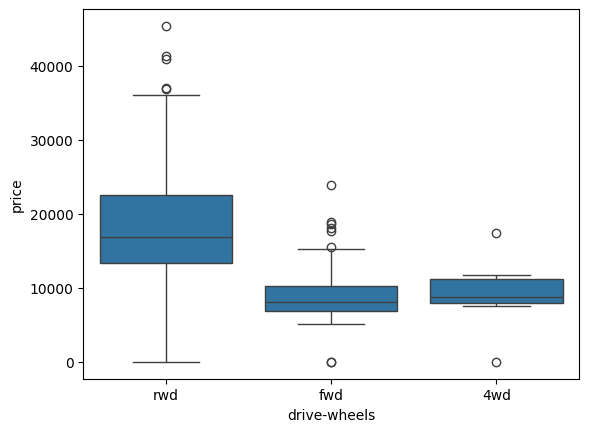

In [24]:
sns.boxplot(x = 'drive-wheels', y = 'price', data = df)

Con lo anterior y utiliizando la libreria seaborn para graficar en este caso con boxplot, tenomos que podemos hacer una analisis rapido de los precios de los autos en base a la traccion en las ruedas(drive-wheels y price en el df). De esta forma mejoramos el analisis exploratorio y la interpretacion.

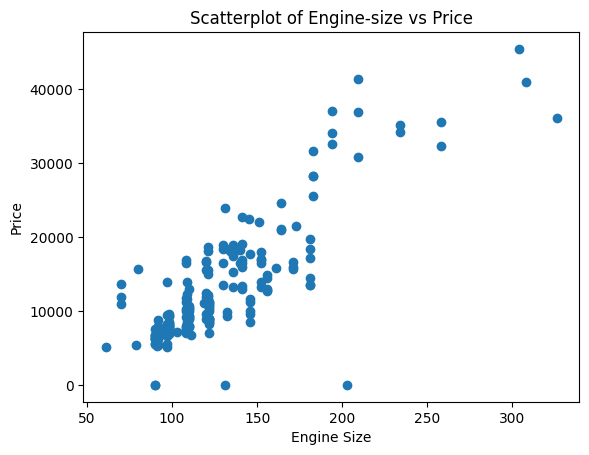

In [25]:
y = df['price']
x = df['engine-size']
plt.title('Scatterplot of Engine-size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.scatter(x, y)

En esta parte de la ESTADISTICA DESCRIPTIVA, tenemos que aplicando un grafico de dispercion podemos hacer una relacion entre el tamaño del motor del auto con el precio del mismo, para esto usamos la libreria matplotlib.pyplot(plt) para generar el grafico con el siguiente codigo y = df['price'], x = df['engine-size'], plt.scatter(x, y), tambien le damos titulos a los ejes x e y para identificar que variable esta representada en que eje de esta forma plt.xlabel('Engine Size')
plt.ylabel('Price').

In [26]:
df_test = df[['drive-wheels', 'body-style', 'price']]
df_grp = df_test.groupby(['drive-wheels', 'body-style'], as_index= False).mean()
df_test

,drive-wheels,body-style,price
0,rwd,convertible,13495
1,rwd,convertible,16500
2,rwd,hatchback,16500
3,fwd,sedan,13950
4,4wd,sedan,17450
...,...,...,...
200,rwd,sedan,16845
201,rwd,sedan,19045
202,rwd,sedan,21485
203,rwd,sedan,22470


AGRUPACION DE COLMNAS CON VALORES CATEGORICOS INCLUIDOS. En este punto, lo que buscamos es relaciones entre las diferentes comnas para mejorar el analisis, en este caso, comparamos la estructura del auto y la traccion para saber que tanto varia el precio en consecuencia. Para esto, con el siguiente codigo df_test = df[['drive-wheels', 'body-style', 'price']] creamos un nuevo df con solo las columnas 'drive-wheels', 'body-style', 'price' que son con las que vamos a hacer la relacion. Para agrupar las columnas seleccionadas usamos df_grp = df_test.groupby(['drive-wheels', 'body-style'], as_index=False).mean(), destacamos la seccion de as_index=False que utilizamos para evitar que las columnas agrupadas se vuelvan indices y que no se pueda trabajar con ellas de forma correcta.

In [27]:
df_pivot = df_grp.pivot(index='drive-wheels', columns='body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   3801.500000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9467.526316   
rwd              23949.6  24202.714286  13583.157895  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

METODO DE PIVOTE. Es un metodo utilizado para mejorar la visualizacion de los datos organizados anteriormente, es útil para convertir datos largos (en formato vertical) a un formato más ancho (tabla cruzada).

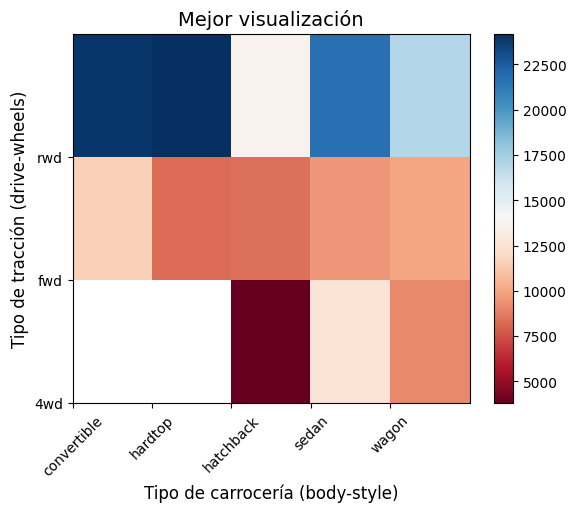

In [28]:
plt.pcolor(df_pivot, cmap='RdBu')
plt.title('Mejor visualización', fontsize=14)
plt.xlabel('Tipo de carrocería (body-style)', fontsize=12)
plt.ylabel('Tipo de tracción (drive-wheels)', fontsize=12)
plt.xticks(ticks=range(len(df_pivot.columns)), labels=['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'], rotation=45, fontsize=10)
plt.yticks(ticks=range(len(df_pivot.index)), labels=['4wd', 'fwd', 'rwd'], fontsize=10)
plt.colorbar()
plt.show()

Con la imagen anterior, visualizamos de mejor manera l ainformacion que tenemos sobre la traccion y carroceria frente al precio. Para esto utlizamos el codigo plt.pcolor(df_pivot, cmap='RdBu') con el que creamos el heatmap con los colores rojo y azul(RdBu=supongo que son abreviaciones). Con el codigo plt.colorbar() ponemos la paleta de colores a la derecha para saber que color representa a que precio. Con los codigos plt.title('Mejor visualización', fontsize=14)
plt.xlabel('Tipo de carrocería (body-style)', fontsize=12)
plt.ylabel('Tipo de tracción (drive-wheels)', fontsize=12)
plt.xticks(ticks=range(len(df_pivot.columns)), labels=['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'], rotation=45, fontsize=10)
plt.yticks(ticks=range(len(df_pivot.index)), labels=['4wd', 'fwd', 'rwd'], fontsize=10) solo mejoramos un poco la grafica poiendole titulos y etiquetas para identificar que paleta de colores representa a las categorias.

(0.0, 50000.0)

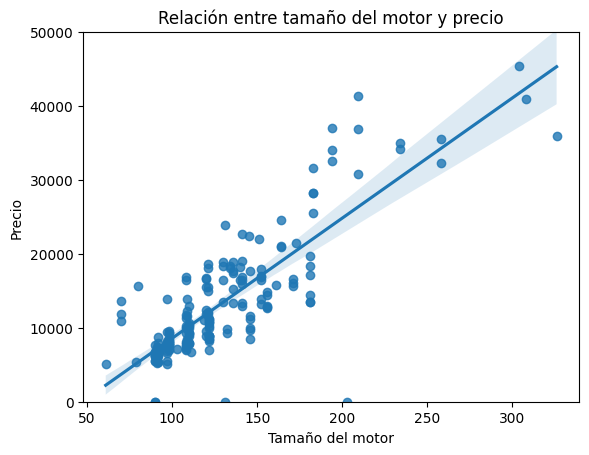

In [29]:
sns.regplot(x = 'engine-size', y = 'price', data = df)
plt.title('Relación entre tamaño del motor y precio')
plt.xlabel('Tamaño del motor')
plt.ylabel('Precio')
plt.ylim(0, 50000)

CORRELACION. Con este metodo identificamos como afecta una variable a otra, en este caso el tamaño del motor del auto con el precio en el cual vemos una correlacion positiva, osea que las dos aumentan, para esto usamos el codigo sns.regplot(x = 'engine-size', y = 'price', data = df) que relaciona los ejes x e y con las variables y data = df especifica que esas variables se encuentran en df, asi mismo usamos el codigo plt.ylim(0, 50000) para trazar una linea con la que podamos visualizar la correlacion, el (0, 50000) son los limites desde donde van las lineas. Los demas codigo son los que utlizamos en otros modulos para organizar los graficos.

(0.0, 50000.0)

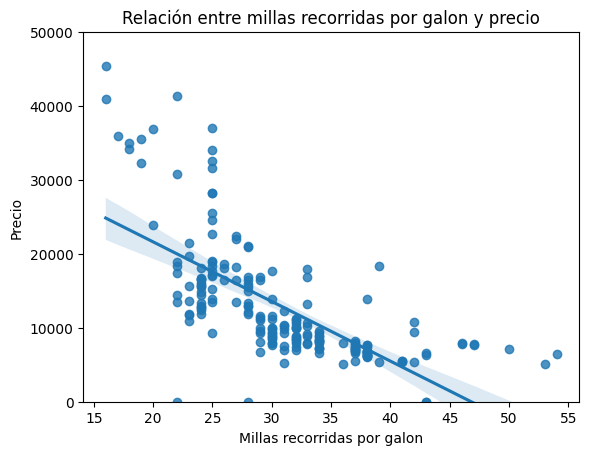

In [30]:
sns.regplot(x = 'highway-mpg', y = 'price', data = df)
plt.title('Relación entre millas recorridas por galon y precio')
plt.xlabel('Millas recorridas por galon')
plt.ylabel('Precio')
plt.ylim(0, 50000)

En este caso la correlacion es negativa, lo que indica que entre mas millas recorridas por galon tenga un auto mas barato es, aunque la correlacion es negativa al analizar la pendiente que se genera podemos tomarla como un indicativo del precio en cierta medida. 

(0.0, 50000.0)

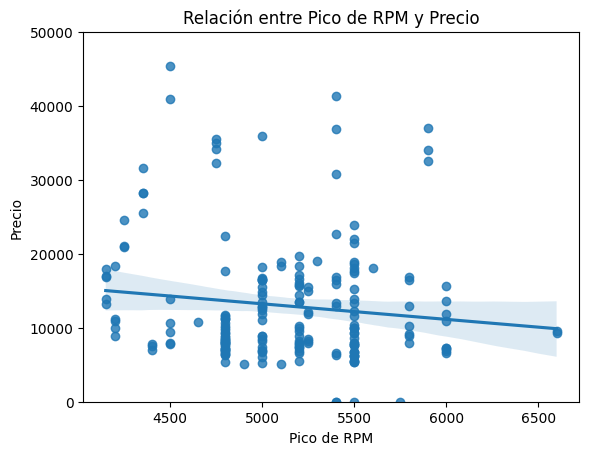

In [31]:
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors='coerce')
sns.regplot(x = 'peak-rpm', y = 'price', data = df)
plt.title('Relación entre Pico de RPM y Precio')
plt.xlabel('Pico de RPM')
plt.ylabel('Precio')
plt.ylim(0, 50000)

Para completar el entendimiento, tenemos un ejemplo de cuando dos variables no tienen reacion, esto pasa cuando los punto no se adecuan a la linea en su mayoria, muy diferente a la relacion positiva o negativa que donde los punto si tenian una tendencia.

In [32]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
pearson_coef, p_value = scipy.stats.pearsonr(df['horsepower'], df['price'])
pearson_coef, p_value

(np.float64(nan), np.float64(nan))

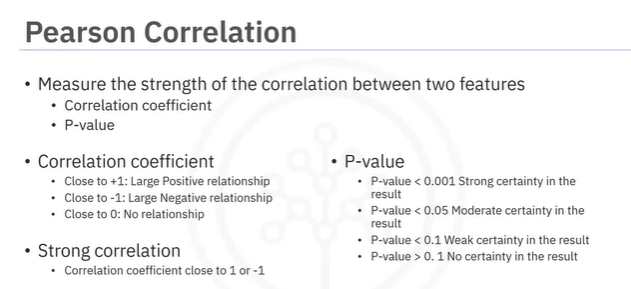
En esta imagen se explica la CORRELACION DE PEARSON, en ella podemos identificar el grado de correlacion dependiendo de otros factores numericos al comparar dos variables.
Asi mismo, en el codigo pearson_coef, p_value = scipy.stats.pearsonr(df['horsepower'], df['price']) lo que hacemos es calcular esos valores (el coeficiente pearson y el valor p) e interpretar el grado de correlacion con la imagen, 

# MODULO 4. DESARROLLO DE MODELOS.

In [33]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
x1 = df[['highway-mpg']]
y1 = df['price']
lm.fit(x1, y1)
y1hat = lm.predict(x1)
y1hat


array([15975.79026479, 15975.79026479, 16782.55750053, 13555.48855758,
       20009.62644348, 17589.32473626, 17589.32473626, 17589.32473626,
       21623.16091495, 20009.62644348, 14362.25579332, 14362.25579332,
       15169.02302905, 15169.02302905, 17589.32473626, 20009.62644348,
       20009.62644348, 21623.16091495, -5000.15786438,  3067.51449299,
        3067.51449299,  4681.04896447,  7101.35067168, 13555.48855758,
        7101.35067168,  7101.35067168,  7101.35067168, 13555.48855758,
       13555.48855758, 18396.091972  , -5806.92510011,  7101.35067168,
        3874.28172873, 10328.41961463, 10328.41961463, 10328.41961463,
       10328.41961463, 11135.18685037, 11135.18685037, 11135.18685037,
       11135.18685037, 15169.02302905, 12748.72132184, 14362.25579332,
        3067.51449299,  3067.51449299, 14362.25579332, 22429.92815069,
       22429.92815069, 24043.46262216, 12748.72132184,  7101.35067168,
        7101.35067168,  7101.35067168,  7101.35067168, 19202.85920774,
      

REGRESION LINEAL SIMPLE. En la anterior linea nosotros buscamos crear un modelo de regresion lineal que prediga el valor de un auto dependiendo de las millas recorridas por galones. Para esto usamos el codigo from sklearn.linear_model import LinearRegression para importar la clase LinearRegression(Nota mental, sino recordas lo de las clase ve a la carpeta python avanzado) que nos ayuda a crear nuestro modelo en blanco por asi decirlo mientras le damos forma.
Con los codigos lm = LinearRegression(), x1 = df[['highway-mpg']],y1 = df['price'] definimos cada uno de los ejes x e y asi como lo que va a contener nuestro modelo. Con lm.fit(x1, y1) entrenamos nuestro modelo, ya que el modelo entiende la relacion entre las dos variables y se ajusta a lo que queremos(En otras palabras, encuentra la mejor línea recta que se ajusta a los datos.). Para finalizar con y1hat = lm.predict(x1) predecimos los precios dependiendo de las millas recorridas por galon de los autos como tal.

In [34]:
from sklearn.ensemble import HistGradientBoostingRegressor
lm2 = HistGradientBoostingRegressor()
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm2.fit(z, df['price'])
y2hat = lm2.predict(z)
y2hat

array([14589.26804707, 14589.26804707, 16110.13100938, 11762.48918874,
       18770.35740009, 14574.34769418, 18655.03505742, 18967.6967315 ,
       18986.87457682, 13190.82165412, 14079.27469419, 14079.27469419,
       17902.98678856, 18854.68994375, 21528.44373758, 31269.75906024,
       33704.93448714, 33704.93448714,  5458.71653044,  4574.85550059,
        4574.85550059,  5458.71653044,  5458.71653044,  9069.27359471,
        6464.43171584,  6551.15818717,  6551.15818717,  9069.27359471,
        8992.17655547, 13511.29495355,  5689.80829044,  5279.63423218,
        5458.71653044,  5848.77244955,  6920.96314616,  7220.89349356,
        7211.15407683,  8130.04267226,  8507.45392659,  8899.90293059,
       10092.58697427, 12898.08047113, 10267.4901574 ,  7494.73581123,
        4574.85550059,  4574.85550059, 13585.29014416, 33704.93448714,
       33704.93448714, 33704.93448714,  5268.55898235,  5458.71653044,
        5458.71653044,  6470.96770617,  6530.25920281, 12484.94847429,
      

REGRESION LINEAL MULTIPLE. En esta regresion para tener una mejor certeza de una prediccion se mira desde diferentes variables el desarrollo del modelo, solo resaltare los codigos nuevos. Para este modelo usamos el codigo z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']] con el cual agrupamos en z las variables que nos ayudaran a predecir el precio de un auto en especifico. De igual forma utilizamos el codigo from sklearn.ensemble import HistGradientBoostingRegressor para traer la clase HistGradientBoostingRegressor que al igual que la clase LinearRegression usamos para hacer un modelo en blanco, una diferencia entre una y la otra es que la primera la usamos en datos que tengan valores NA(No sabia y me toco utilizarla por eso.) y la otra funciona con valores completos. Al igual que con la anterior linea utilizamos este codigo lm2.fit(z, df['price'])
y2hat = lm2.predict(z) para entrenar nuestro modelo y para predeciir el mejor precio respectivamente.(NOTA MENTAL: Repasar los conceptos, aqui se tratan temas que seria bueno que pudiera entender a mayor profundidad.) NOTA: Con el codigo lm.intercept_, lm.coef_ podemos sacar el intercepto y el coeficiente de nuestro modelo, pero este solo funciona con la clase LinearRegression, por eso lo importante de tratar los datos NA antes de comenzar a hacer todo el calculo.

(0.0, 50000.0)

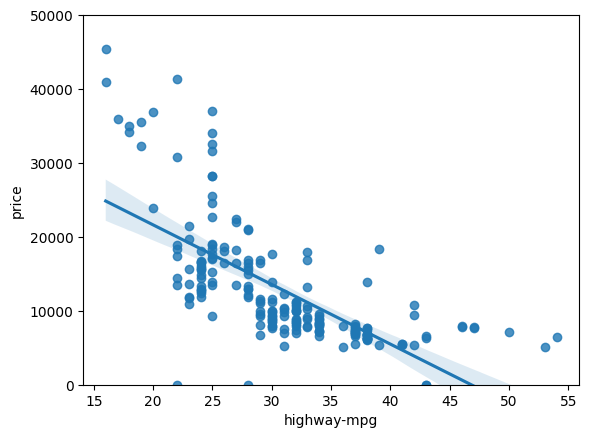

In [35]:
sns.regplot(x = 'highway-mpg', y = 'price', data = df)
plt.ylim(0, 50000)

Para esta etapa, analizaremos los modelos de regresion mediante visualizacion, esto lo hacemos con la biblioteca seaborn y el codigo sns.regplot(x = 'highway-mpg', y = 'price', data = df) que ya habiamos utilizado anteriormente, con esta visualizacion lo que buscamos es analizar si nuestro modelo de regresion se adecua o no a nuestros valores.

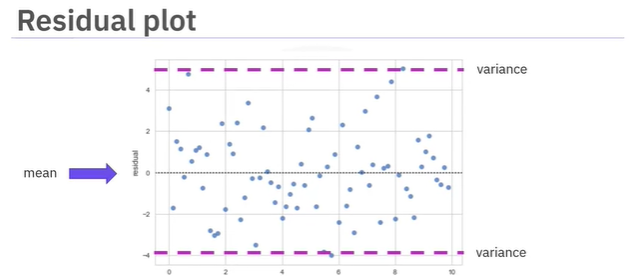
En la imagen tenemos un ejemplo de como seria un modelo que se adecua a nuestros datos, que a grandes rasgos para este modelo quiere decir que siempre que los datos se distribuyan bien entre las dos varianzas entonces podemos decir que es un modelo apropiado.(Nota: Hay que complementar este concepto para entenderlo mejor.)

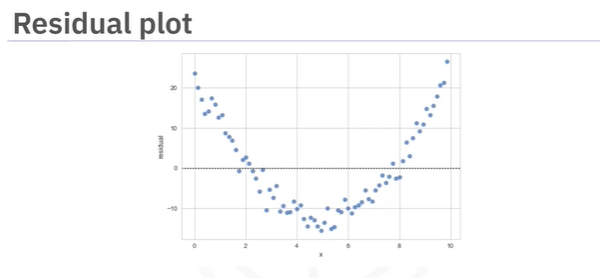 Para este ejemplo tenemos lo contrario, en la imagen, los residuos(puntos) se segregan en grupos por regiones(Que no se distribuyen aleatoriamente), formando cuervatura, esto sugiere que nuestro modelo lineal no es el adecuado.

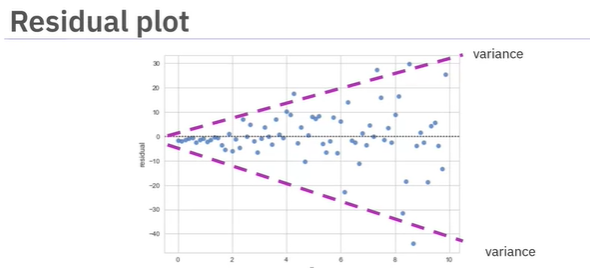 Para este ultimo modelo, vemos que la varianza de los residuos aumenta con x, lo que tambien sugiere que nuestro modelo es incorrecto en este caso.

<Axes: xlabel='highway-mpg', ylabel='price'>

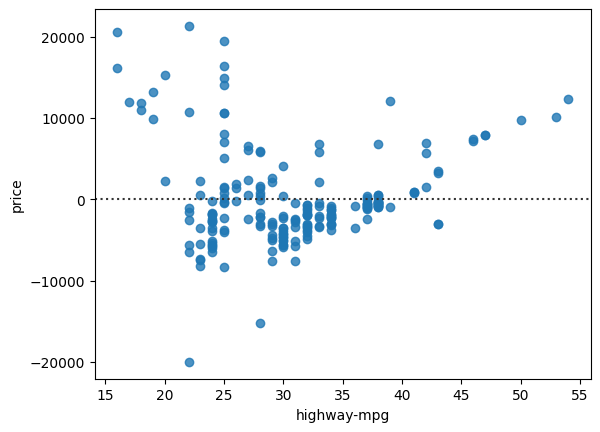

In [36]:
sns.residplot(x='highway-mpg', y='price', data=df)

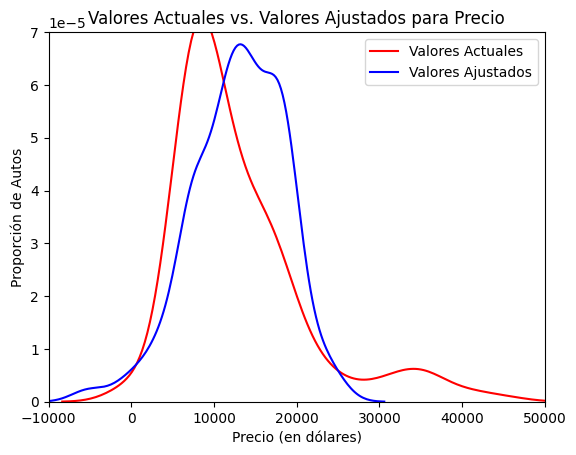

In [37]:
sns.kdeplot(df['price'], color='r', label='Valores Actuales')
sns.kdeplot(y1hat, color='b', label='Valores Ajustados')
plt.title('Valores Actuales vs. Valores Ajustados para Precio')
plt.xlabel('Precio (en dólares)')
plt.ylabel('Proporción de Autos')
plt.xlim(-10000, 50000)  # Ajustar los límites del eje x
plt.ylim(0, 7e-5)  # Ajustar los límites del eje y
plt.legend()
plt.show()

Con el siguiente GRAFICO DE DENSIDAD comparamos los valores reales de nuestros autos con los valores predichos por nuestro modelo(y1hat), para esto usamos el codigo corregido por IA sns.kdeplot(df['price'], color='r', label='Valores Actuales')
y sns.kdeplot(y1hat, color='b', label='Valores Ajustados') con el que hacemos la grafica roja y azul respectivamente, en este caso toco correguirla con IA porque el codigo propuesto en la clase no er adecuado(Hasta la fecha no entiendo si es por versiones diferentes en las bibliotecas o por alguna otra razon) el codigo en profundidad ya lo hemos visto en las anteriores clases.(Revisar de ser necesario.) El resto de codigo es para mejorar visualmente el grafico.


In [38]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
p

poly1d([-5.26110889e-03,  2.90505153e+00, -3.19019888e+02,  1.65739312e+04])

In [39]:
from sklearn.preprocessing import PolynomialFeatures
x = df[['horsepower', 'curb-weight']].dropna()
pr = PolynomialFeatures(degree=2, include_bias=False) 
x_poly = pr.fit_transform(x) 
x_poly

array([[1.1100000e+02, 2.5480000e+03, 1.2321000e+04, 2.8282800e+05,
        6.4923040e+06],
       [1.1100000e+02, 2.5480000e+03, 1.2321000e+04, 2.8282800e+05,
        6.4923040e+06],
       [1.5400000e+02, 2.8230000e+03, 2.3716000e+04, 4.3474200e+05,
        7.9693290e+06],
       ...,
       [1.3400000e+02, 3.0120000e+03, 1.7956000e+04, 4.0360800e+05,
        9.0721440e+06],
       [1.0600000e+02, 3.2170000e+03, 1.1236000e+04, 3.4100200e+05,
        1.0349089e+07],
       [1.1400000e+02, 3.0620000e+03, 1.2996000e+04, 3.4906800e+05,
        9.3758440e+06]])

In [40]:
from sklearn.preprocessing import StandardScaler
SCALE = StandardScaler()
x = df[['horsepower', 'curb-weight']].dropna()
SCALE.fit(x)
x_scale = SCALE.transform(x)
x_scale

array([[ 0.17022842, -0.01517714],
       [ 0.17022842, -0.01517714],
       [ 1.25563669,  0.5117283 ],
       [-0.05695005, -0.41945731],
       [ 0.27119664,  0.51364432],
       [ 0.14498637, -0.09373395],
       [ 0.14498637,  0.55196471],
       [ 0.14498637,  0.76272689],
       [ 0.90224795,  1.0156415 ],
       [ 1.40708901,  0.95241285],
       [-0.0821921 , -0.30832817],
       [-0.0821921 , -0.30832817],
       [ 0.42264895,  0.29521806],
       [ 0.42264895,  0.40059915],
       [ 0.42264895,  0.95624489],
       [ 1.96241417,  1.29154835],
       [ 1.96241417,  1.57895131],
       [ 1.96241417,  1.81845378],
       [-1.4200209 , -2.04615811],
       [-0.86469574, -1.30657447],
       [-0.86469574, -1.23951378],
       [-0.91517984, -1.30274243],
       [-0.91517984, -1.30274243],
       [-0.05695005, -0.81990545],
       [-0.91517984, -1.12838463],
       [-0.91517984, -1.0862322 ],
       [-0.91517984, -1.0862322 ],
       [-0.05695005, -0.6991962 ],
       [-0.41033879,

Con los 3 anteriores codigos modelamos una REGRESION POLINOMICA a nuestros datos.Esto lo hacemos cuando el modelo lineal no se adecua a nuestras variables, cuando una relacion en este caso entre [['horsepower', 'curb-weight']] es no lineal y muestra curvatura, podemos aplicar un modelo polinomico, con este mejoramos la interpretacion y el ajuste de los datos entre otras consideraciones. NOTA: Para entender un poco mejor este modelo repasar conceptos, puede ayudar el siguiente link https://www.youtube.com/watch?v=lnilw1y6n2o 

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
inp = [
    ('polynomial', PolynomialFeatures(degree=2)),
    ('scale', StandardScaler()),
    ('model', LinearRegression())
]
pipe = Pipeline(inp)
df_clean = df.dropna(subset=['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'price'])
x = df_clean[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df_clean['price']
pipe.fit(x, y)
y_pred = pipe.predict(x)
y_pred

array([13706.82475915, 13706.82475915, 17831.01556998, 10802.28487466,
       16391.70389385, 14369.11922495, 15174.26431224, 15497.03258377,
       18299.18751086, 17192.73607171, 10853.8751572 , 10853.8751572 ,
       16455.99616041, 16567.17666909, 18746.20896488, 26052.81765086,
       24898.93705281, 26570.22512796,  4233.49530443,  5856.09095087,
        5837.26800444,  5955.76243266,  5852.01844317, 10911.48399182,
        6055.40838909,  6107.61118368,  6107.61118368, 10648.23215022,
       11059.09459684, 19576.91025083,  5166.07724534,  6663.16709365,
        5131.89485142,  6636.90460426,  6661.37854288,  6748.58767693,
        6772.35838651,  8895.61986881,  9010.01583303,  9043.63590727,
        9202.92959109, 11210.0433654 , 10452.42072264,  8507.88813082,
        5856.09095087,  5837.26800444, 11961.46185216, 36048.96661241,
       36048.96661241, 41671.4685321 ,  4466.66946621,  5937.14429499,
        5948.87600701,  6044.9247466 ,  6057.20521948, 10325.24365379,
      

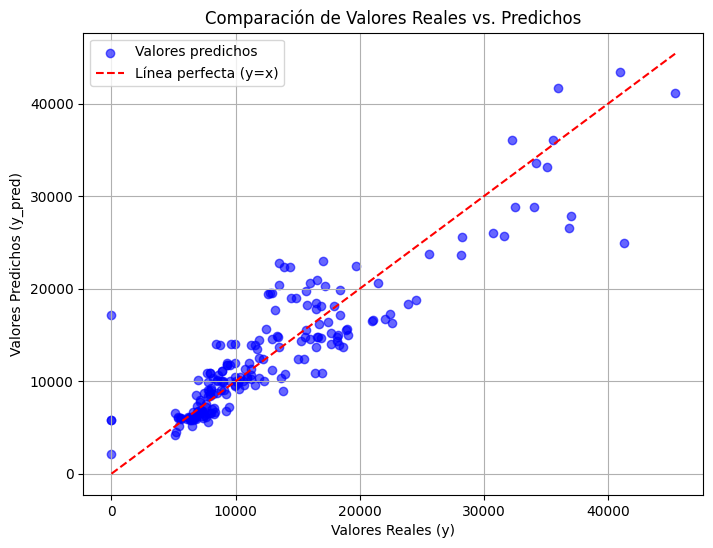

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.6, label='Valores predichos')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Línea perfecta (y=x)')
plt.xlabel('Valores Reales (y)')
plt.ylabel('Valores Predichos (y_pred)')
plt.title('Comparación de Valores Reales vs. Predichos')
plt.legend()
plt.grid(True)
plt.show()

PIPELINES O TUBERIAS, esto requiere mucha dedicacion, es a grandes razgos entendible, lo que se busca es a partir de varias variables predecir el precio real de los autos, esto teniendo en cuenta si la variable es categorica o numerica y mas. Aunque parece sencillo, se necesita mucho mas conocimiento. NOTA: dejo link y recordatorio de lo mucho que se debe repasar esto. https://www.youtube.com/watch?v=Vnt3kbs6u6s

In [43]:
df_price_filtered = df['price'].iloc[:len(y_pred)]
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df_price_filtered, y_pred)
varianza = np.var(df['price'])
varianza, mse

(np.float64(64952545.552314095), 15057469.671886275)

Elemplo de MSE o  MEAN SQUARE ERROR (error cuadratico medio), es una métrica utilizada para evaluar la precisión de un modelo de predicción en problemas de regresión. Lo que se busca es calcular el promedio de las diferencias al cuadrado entre los valores reales y los valores predichos. Para entender cuando un error es alto o bajo tenemos estos dos ejemplos por IA: Si estás prediciendo precios de casas en miles de dólares ($), un MSE de 1,000,000,000 ($1M²) indica un error promedio al cuadrado de unos $31,622 (porque la raíz cuadrada de 1,000,000,000 es aproximadamente 31,622). Esto sería alto si esperabas predicciones precisas. Asi mismo para un valor bajo: Si estás prediciendo precios de casas y el MSE es 10,000 ($100²), significa que el error promedio al cuadrado es de $100. Esto podría considerarse bajo dependiendo del problema.
Si el MSE es similar a la varianza o incluso mayor, el modelo no está funcionando bien porque sus predicciones son tan erráticas como los datos sin modelar.

In [44]:
xx = df[['highway-mpg']]
yy = df['price']
lm.fit(xx, yy)
lm.score(xx, yy)

0.47289700751877217

Calculo del R cuadrado del modelo, con esto nos cercioramos que el modelo que usamos, al analizar nuestras dos variables es adecuado, en este caso el R cuadrado es de 0.472897 lo que indica que es una relacion deficiente, si este valor fuera negativo quiere decir que nuestro modelo esta muy sobreajustado y aun asi no seria adecuado. Cuando el R cuadrado esta mas cerca de 1 quiere decir que el modelo y la relacion de las variables esta acertado, entre mas se acerque a 0 quiere decir que el modelo no se adecua.

In [45]:
lm.fit(df[['highway-mpg']], df['price'])
ejemplo1 = lm.predict(np.array(30.0).reshape(-1, 1))
ejemplo1, lm.coef_


c:\Users\Germa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(array([13555.48855758]), array([-806.76723574]))

Aqui estamos prediciendo el valor de un auto en funcion de las miyas que tiene, si tenemos que el auto tiene 30 millas el precio es de 13555, esto teniendo en cuenta el codigo ejemplo1 = lm.predict(np.array(30.0).reshape(-1, 1)) donde tenemos que vamos a crear una nueva matriz de un solo valor con np.array(30.0).reshape(-1, 1) de esta forma nuestra prediccion se ejecuta en una matriz bidimencional con 1 fila y 1 columna(resahape(-1, 1) hace psible esa distribucion) esto teniendo en cuenta que entrenamos nuestro modelo con el codigo: lm.fit(df[['highway-mpg']], df['price']) que yya hemos venido utilizando. Por ultimo, sacamos el coeficiente con el que obtenemos un valor de -806.7 que a grandes razgos nos indica cuanto disminuye el valor por milla recorrida, llevandolo a dolares, quiere decir que por cada milla recorrida el precio del auto disminuye en 806 dolares.

In [46]:
new_inp = np.arange(1, 101, 1).reshape(-1, 1)
y1hat = lm.predict(new_inp)
y1hat

c:\Users\Germa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 36951.73839396,  36144.97115822,  35338.20392248,  34531.43668674,
        33724.66945101,  32917.90221527,  32111.13497953,  31304.3677438 ,
        30497.60050806,  29690.83327232,  28884.06603658,  28077.29880085,
        27270.53156511,  26463.76432937,  25656.99709364,  24850.2298579 ,
        24043.46262216,  23236.69538642,  22429.92815069,  21623.16091495,
        20816.39367921,  20009.62644348,  19202.85920774,  18396.091972  ,
        17589.32473626,  16782.55750053,  15975.79026479,  15169.02302905,
        14362.25579332,  13555.48855758,  12748.72132184,  11941.9540861 ,
        11135.18685037,  10328.41961463,   9521.65237889,   8714.88514316,
         7908.11790742,   7101.35067168,   6294.58343594,   5487.81620021,
         4681.04896447,   3874.28172873,   3067.51449299,   2260.74725726,
         1453.98002152,    647.21278578,   -159.55444995,   -966.32168569,
        -1773.08892143,  -2579.85615717,  -3386.6233929 ,  -4193.39062864,
        -5000.15786438,  

# MODULO 5. EVALUACION Y PERFECCIONAMIENTO DEL MODELO.

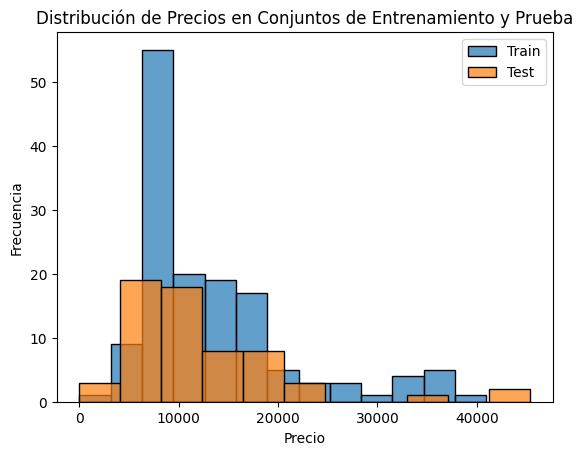

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['horsepower'], df['price'], test_size=0.3, random_state=0)
sns.histplot(y_train, label='Train', alpha=0.7)
sns.histplot(y_test, label='Test', alpha=0.7)
plt.legend()
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios en Conjuntos de Entrenamiento y Prueba')
plt.show()

En el anterior codigo x_train, x_test, y_train, y_test = train_test_split(df['fuel-type'], df['price'], test_size=0.3, random_state=0) se divide un conjunto de datos en conjuntos de entrenamiento y prueba para el aprendizaje automático. De esta forma evaluamos que tan preciso es nuestro modelo y como se adecua a la vida real.

In [48]:
from sklearn.model_selection import cross_val_score
model = LinearRegression()
scores = cross_val_score(model, df['engine-size'].values.reshape(-1, 1), df['price'], cv=3)
np.mean(scores)

np.float64(0.6353448278507924)

Este código realiza una evaluación del rendimiento de un modelo de regresión lineal utilizando la técnica de validación cruzada de 3 pliegues. La validación cruzada ayuda a obtener una estimación más confiable del rendimiento del modelo, ya que evita el sobreajuste y proporciona una mejor idea de cómo el modelo se desempeñará en datos nuevos e independientes. Para entender si el modelo tiene un buen rendimiento o no tenemos que el objetivo del codigo es sacar la media de los R cuadrado de las evaluaciones de rendimiento, entendemos que el R cuadrado que se acerque a 1 es un buen indicativo por tanto, si el modelo es bueno o no dependera de esto.

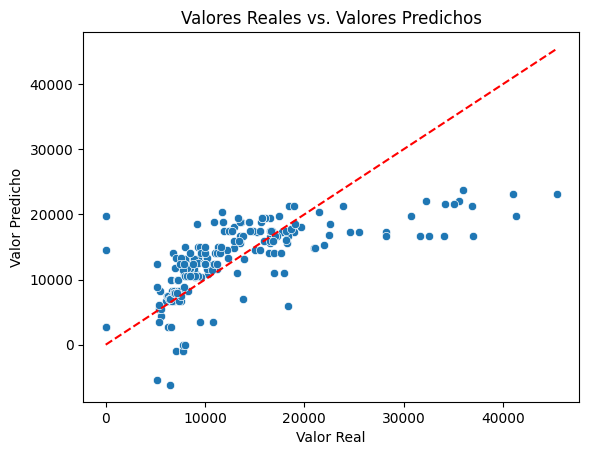

In [49]:
from sklearn.model_selection import cross_val_predict
model = LinearRegression()
yyy = cross_val_predict(model, df['highway-mpg'].values.reshape(-1, 1), df['price'], cv=3)
df_results = pd.DataFrame({'Actual': df['price'], 'Predicted': yyy})

# Crear el gráfico de dispersión
sns.scatterplot(x='Actual', y='Predicted', data=df_results)

# Agregar línea de identidad
plt.plot([df['price'].min(), df['price'].max()], [df['price'].min(), df['price'].max()], color='red', linestyle='--')

# Personalizar el gráfico
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Valores Reales vs. Valores Predichos')

# Mostrar el gráfico
plt.show()

En el anterior codigo vemos una aplicacion del la PREDICCION CRUZADA. La predicción cruzada es una técnica estadística ampliamente utilizada en el aprendizaje automático para evaluar la precisión y generalización de un modelo. En lugar de simplemente dividir los datos en un conjunto de entrenamiento y otro de prueba, la predicción cruzada implica dividir los datos en múltiples subconjuntos (llamados pliegues) y entrenar y evaluar el modelo repetidamente en diferentes combinaciones de estos subconjuntos.
Interpretación del gráfico:
- Puntos cercanos a la línea diagonal: Indican que el modelo está haciendo predicciones precisas.
- Puntos alejados de la línea diagonal: Indican que el modelo está cometiendo errores de predicción.
- Patrones en los puntos: Si los puntos forman un patrón específico (por ejemplo, una curva), podría indicar que el modelo no está capturando correctamente la relación entre las variables.

In [50]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
resqu_test = []
order = [1, 2, 3, 4]
for n in order:
    prr = PolynomialFeatures(degree=n)
    x_train_imputed = imputer.fit_transform(x_train.values.reshape(-1, 1))
    x_test_imputed = imputer.transform(x_test.values.reshape(-1, 1))
    model = LinearRegression()
    model.fit(x_train_imputed, y_train)
    resqu_test.append(model.score(x_test_imputed, y_test))
resqu_test

[0.17667610205495976,
 0.17667610205495976,
 0.17667610205495976,
 0.17667610205495976]

Con lo anterior creamos una lista para identificar que grado polinomico se adecua mejor a nuestro modelo, en la ejecucion del codigo vemos que los numero que aparecen son los R cuadrados de los diferentes grados polinomicos pero estos son en escencia los mismo lo que indica que la aplicacion polinomica no se adecua a nuestros datos.

In [51]:
from sklearn.linear_model import Ridge
ridgemodel = Ridge(alpha = 0.1)
ridgemodel.fit(x, y)
y1hat = ridgemodel.predict(x)

REGRECION RIDGE. es una técnica de regularización que se utiliza para evitar el sobreajuste en modelos de regresión lineal. El sobreajuste ocurre cuando un modelo se ajusta demasiado a los datos de entrenamiento y, como consecuencia, tiene un bajo rendimiento en datos nuevos.

In [52]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
patametros = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]}]
rr = Ridge()
grid1 = GridSearchCV(rr, patametros, cv=4)
return_train_score=True
x_imputed = imputer.fit_transform(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
grid1.fit(x_imputed, df['price'])
grid1.best_estimator_
score = grid1.cv_results_
score['mean_test_score']


array([0.62899108, 0.6289927 , 0.62900737, 0.62915277, 0.6304878 ,
       0.63714769, 0.63852317, 0.60657102])

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

parameters = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]}]
RR = Ridge()
grid1 = GridSearchCV(RR, parameters, cv=4)
grid1.fit(x_imputed, df['price'])  # Elimina la coma aquí

BestRR = grid1.best_estimator_
BestRR.score(x_test([['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]), y_test)


TypeError: 'Series' object is not callable

In [53]:
mean_train_scores = df_results.get('mean_train_score', [])
mean_test_scores = df_results.get('mean_test_score', [])
params = df_results.get('params', [])
for param, mean_val, mean_train in zip(params, mean_test_scores, mean_train_scores):
    print(param, 'R^2 on test data:', mean_val, 'R^2 on train data:', mean_train)